In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
validate = pd.read_csv("validation.csv")

# for i in train.columns:
#     print(i)

# print(train["profit_margin"])

X_train = train.drop(["profit_margin"], axis=1)
X_test = test.drop(["profit_margin"], axis=1)
X_val = validate.drop(["profit_margin"], axis=1)
y_train = train["profit_margin"]
y_test = test["profit_margin"]
y_val = validate["profit_margin"]

# X_train_c = pd.concat([X_train, X_val], axis=0)
# y_train_c = pd.concat([y_train, y_val], axis=0)

# # print(len(train.columns))
# # print(len(X_train.columns))
# # print(y_train)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [28]:
nn_base = MLPRegressor( max_iter=100, random_state=42)
train_losses = []
val_losses = []

# Training loop
for epoch in range(1, 101):  # Adjust the number of epochs as needed
    nn_base.partial_fit(X_train, y_train)  # Incremental training for better loss tracking
    train_loss = nn_base.loss_
    y_val_pred = nn_base.predict(X_val)
    val_loss = metrics.mean_squared_error(y_val, y_val_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")


Epoch 1, Training Loss: 0.4367977847117032, Validation Loss: 0.6234173381002677
Epoch 2, Training Loss: 0.2883152876343579, Validation Loss: 0.4934058362722262
Epoch 3, Training Loss: 0.2317660743420891, Validation Loss: 0.39378477698755115
Epoch 4, Training Loss: 0.18284654273727025, Validation Loss: 0.305867376947461
Epoch 5, Training Loss: 0.13868042092443653, Validation Loss: 0.23259907779612343
Epoch 6, Training Loss: 0.10375404662936624, Validation Loss: 0.17938320504296826
Epoch 7, Training Loss: 0.0780654865654476, Validation Loss: 0.1405710087588412
Epoch 8, Training Loss: 0.060980946821914836, Validation Loss: 0.1156233237273514
Epoch 9, Training Loss: 0.051269529946027285, Validation Loss: 0.10278579801605593
Epoch 10, Training Loss: 0.04656811971414129, Validation Loss: 0.0967864293652904
Epoch 11, Training Loss: 0.044227627058424014, Validation Loss: 0.09329791136572321
Epoch 12, Training Loss: 0.042824216490563796, Validation Loss: 0.09079021668004807
Epoch 13, Training L

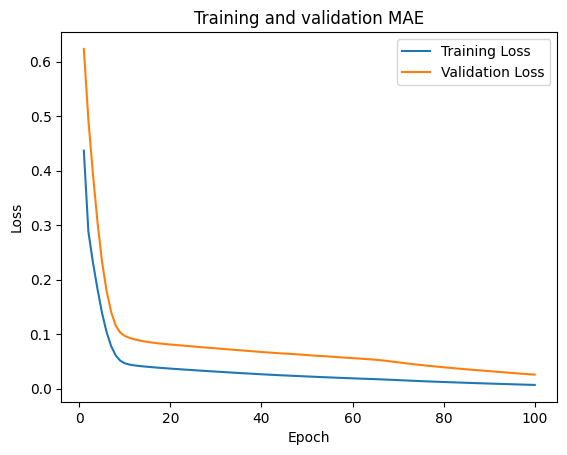

Score: 0.9644703085253654
Predicted values are: 

0 1.909555535139656
1 0.7832735495509981
2 1.4740478833854687
3 0.10849992092026466
4 0.7102991245263026
5 2.120994040071139
6 1.1028045086719953
7 1.055749392624502
8 2.4293035716633455
9 0.04784968355700425
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [31]:
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.title('Training and validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Score:",nn_base.score(X_test, y_test))
predictions = nn_base.predict(X_test[:10])
print("Predicted values are: \n")
for i, val in enumerate(predictions):
    print(i,val)
print("Real values are: \n", y_test[:10])


In [32]:

y_pred = nn_base.predict(X_test)
print("-- BASE MODEL --")
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- BASE MODEL --
Mean squared error:  0.024425985290888366
Root mean squared error:  0.15628814827391221
Mean absolute error:  0.11937085286127369


In [24]:
nn_hyperparam = MLPRegressor(hidden_layer_sizes=(50, 40, 30, 20, 10, 1), verbose = True, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, tol=0.0001,validation_fraction = 0.2, early_stopping=True).fit(X_train, y_train)
# train_losses = []
# val_losses = []

# # Training loop
# for epoch in range(1, 150):  # Adjust the number of epochs as needed
#     nn_hyperparam.partial_fit(X_train, y_train)  # Incremental training for better loss tracking
#     train_loss = nn_hyperparam.loss_
#     y_val_pred = nn_hyperparam.predict(X_val)
#     val_loss = metrics.mean_squared_error(y_val, y_val_pred)
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
#     print(f"Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

Iteration 1, loss = 1.53436205
Validation score: -0.793828
Iteration 2, loss = 0.39687966
Validation score: 0.094767
Iteration 3, loss = 0.31549685
Validation score: 0.171021
Iteration 4, loss = 0.28690602
Validation score: 0.230714
Iteration 5, loss = 0.26446227
Validation score: 0.294516
Iteration 6, loss = 0.23886123
Validation score: 0.363706
Iteration 7, loss = 0.20907408
Validation score: 0.451659
Iteration 8, loss = 0.16846188
Validation score: 0.578655
Iteration 9, loss = 0.11995663
Validation score: 0.719507
Iteration 10, loss = 0.07141265
Validation score: 0.845895
Iteration 11, loss = 0.04094044
Validation score: 0.907239
Iteration 12, loss = 0.02859558
Validation score: 0.922003
Iteration 13, loss = 0.02279827
Validation score: 0.941139
Iteration 14, loss = 0.01865865
Validation score: 0.951150
Iteration 15, loss = 0.01535097
Validation score: 0.960048
Iteration 16, loss = 0.01289670
Validation score: 0.966203
Iteration 17, loss = 0.01130318
Validation score: 0.970011
Itera

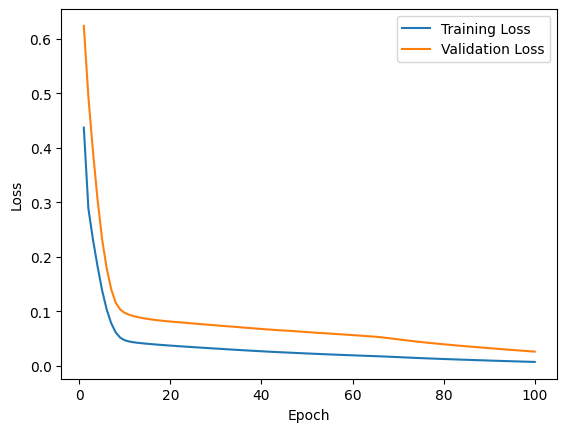

Score: 0.9987432545624568
Predicted values are: 

0 2.1752379800822785
1 0.6659061723419832
2 1.5296675806422593
3 0.0037674095522212125
4 0.6864711335448135
5 2.129154002757364
6 0.778735042792388
7 1.1030837647443494
8 2.4744732256587705
9 -0.010394642285562194
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [33]:
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Score:",nn_hyperparam.score(X_test, y_test))
predictions = nn_hyperparam.predict(X_test[:10])
print("Predicted values are: \n")
for i, val in enumerate(predictions):
    print(i,val)
print("Real values are: \n", y_test[:10])

In [34]:

y_pred = nn_hyperparam.predict(X_test)
print("-- HYPERPARAM MODEL --")
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- HYPERPARAM MODEL --
Mean squared error:  0.0008639885205233733
Root mean squared error:  0.02939368164288668
Mean absolute error:  0.018310607551675337


# Model 1

In [31]:
# define the model
model_1 = Sequential()
model_1.add(Dense(128, input_dim=61, activation='relu'))
model_1.add(Dense(64, activation='relu'))
#Output layer
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_1.summary()

history_1 = model_1.fit(X_train, y_train, epochs =100, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               7936      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
210/210 [==============================] - 0s 995us/step - loss: 0.4909 - mean_absolute_error: 0.5706 - val_loss: 0.1758 - val_mean_absolute_error: 0.3460
Epoch 2/100
210/210 [==============================] - 0s 711us/step - loss: 0.0961 - mean_absolute_error: 0.2474 - val_loss: 0.0659 - val_mean_absolute_error: 0.2013
Epoch 3/100
210/210 [==============================] - 0s 735us/step - loss: 0.0602 - mean_absolute_error: 0.1928 - val_loss: 0.0510 - val_mean_absolute_error: 0.1831
Epoch 4/100
210/210 [==============================] - 0s 713us/step - loss: 0.0486 - mean_absolute_error: 0.1706 - val_loss: 0.0420 - val_mean_absolute_error: 0.1571
Epoch 5/100
210/210 [==============================] - 0s 701us/step - loss: 0.0404 - mean_absolute_error: 0.1521 - val_loss: 0.0366 - val_mean_absolute_error: 0.1558
Epoch 6/100
210/210 [==============================] - 0s 699us/step - loss: 0.0307 - mean_absolute_error: 0.1304 - val_loss: 0.0231 - val_mean_absolute_error: 0.117

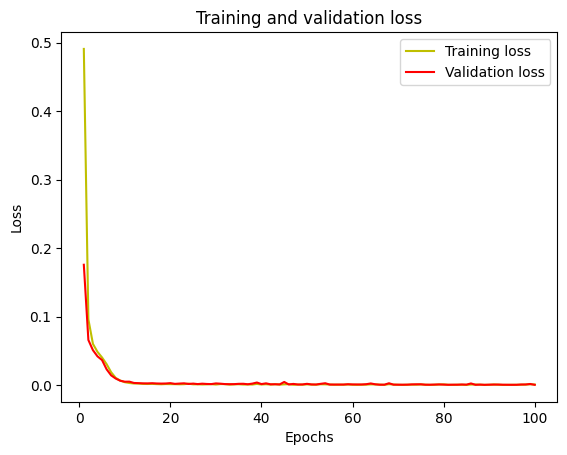

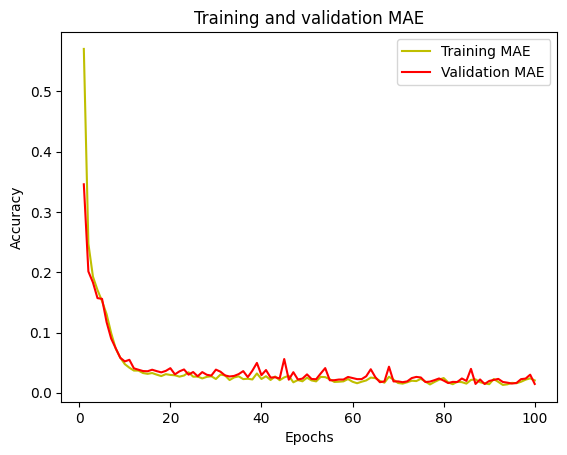

1/1 [==============================] - 0s 30ms/step
Predicted values are: 
 [[ 2.1686556e+00]
 [ 7.0404541e-01]
 [ 1.5331137e+00]
 [ 5.6040883e-03]
 [ 6.7230713e-01]
 [ 2.0901129e+00]
 [ 7.8635466e-01]
 [ 1.0925692e+00]
 [ 2.4456618e+00]
 [-1.5832484e-04]]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [32]:
from matplotlib import pyplot as plt

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_1.history['mean_absolute_error']
val_acc = history_1.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_1.predict(X_test[:10])
print("Predicted values are: \n", predictions)
print("Real values are: \n", y_test[:10])

# Model 2 - More hidden layers

In [40]:
# define the model
model_2 = Sequential()
model_2.add(Dense(50, input_dim=61, activation='relu'))
# model_2.add(Dense(256, activation='relu'))
# model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(40, activation='relu'))
model_2.add(Dense(30, activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(10, activation='relu'))
#Output layer
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_2.summary()

history_2 = model_2.fit(X_train, y_train, epochs =200, validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                3100      
                                                                 
 dense_34 (Dense)            (None, 40)                2040      
                                                                 
 dense_35 (Dense)            (None, 30)                1230      
                                                                 
 dense_36 (Dense)            (None, 20)                620       
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,211
Trainable params: 7,211
Non-traina

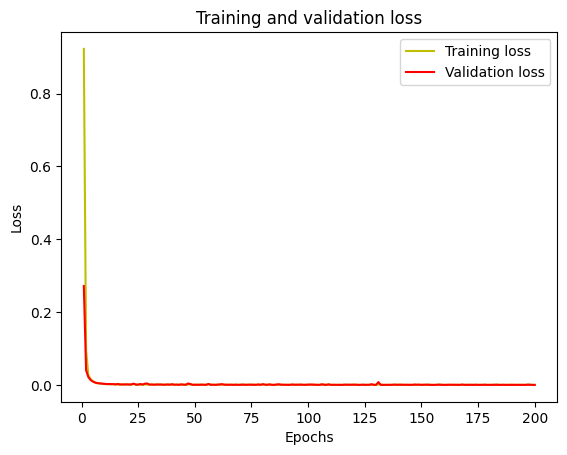

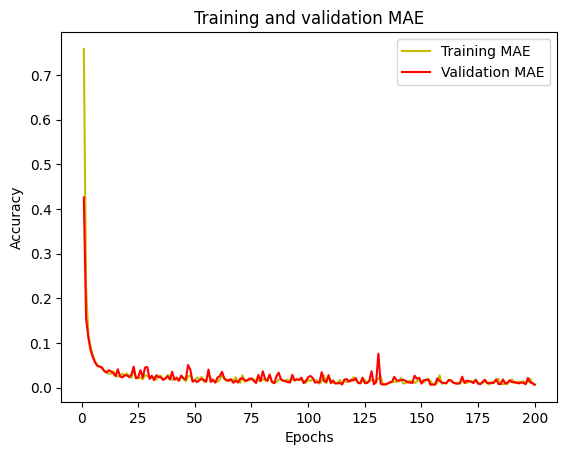

1/1 [==============================] - 0s 39ms/step
Predicted values are: 

0 [2.1977646]
1 [0.6579334]
2 [1.5306141]
3 [0.00603442]
4 [0.6659258]
5 [2.0983179]
6 [0.8070308]
7 [1.0940523]
8 [2.442743]
9 [-0.00019139]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [41]:
from matplotlib import pyplot as plt

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_2.history['mean_absolute_error']
val_acc = history_2.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_2.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Model 3 Different inputs for hidden layers

In [35]:
import tensorflow as tf
# define the model
model_3 = Sequential()
model_3.add(Dense(100, input_dim=61, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(500, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(100, activation='relu'))
#Output layer
model_3.add(Dense(1, activation='linear'))

opt =  tf.keras.optimizers.Adam()

model_3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_3.summary()

history_3 = model_3.fit(X_train, y_train, epochs =200, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               6200      
                                                                 
 dense_28 (Dense)            (None, 300)               30300     
                                                                 
 dense_29 (Dense)            (None, 500)               150500    
                                                                 
 dense_30 (Dense)            (None, 300)               150300    
                                                                 
 dense_31 (Dense)            (None, 100)               30100     
                                                                 
 dense_32 (Dense)            (None, 1)                 101       
                                                                 
Total params: 367,501
Trainable params: 367,501
Non-tr

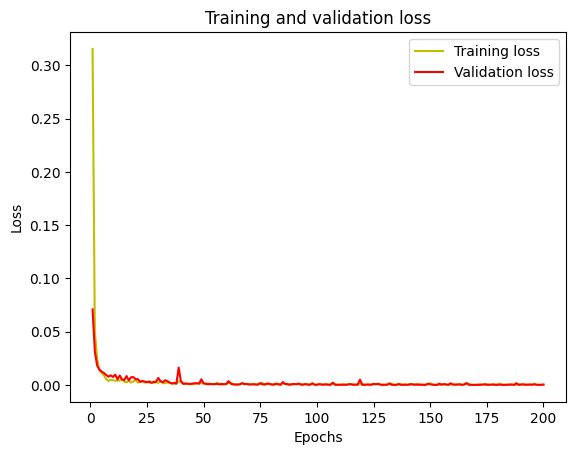

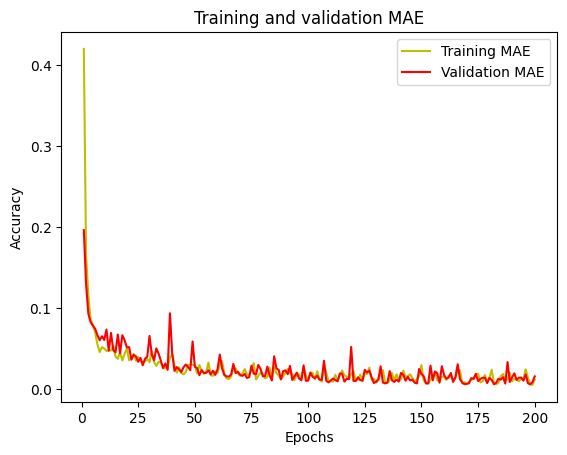

1/1 [==============================] - 0s 38ms/step
Predicted values are: 

0 [2.212701]
1 [0.680635]
2 [1.5522166]
3 [0.00428939]
4 [0.69695795]
5 [2.1261933]
6 [0.81246686]
7 [1.1124507]
8 [2.4632132]
9 [0.00154725]
Real values are: 
 0    2.202784
1    0.654286
2    1.532876
3    0.003263
4    0.674266
5    2.101850
6    0.788783
7    1.095586
8    2.449446
9    0.000691
Name: profit_margin, dtype: float64


In [36]:
from matplotlib import pyplot as plt

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_3.history['mean_absolute_error']
val_acc = history_3.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model_3.predict(X_test[:10])
print("Predicted values are: \n")
for i,p in enumerate(predictions):
    print(i,p)
print("Real values are: \n", y_test[:10])

# Analysis

In [42]:
print("-- MODEL 1 --")
mse, mae = model_1.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 2 --")
mse, mae = model_2.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

print("-- MODEL 3 --")
mse, mae = model_3.evaluate(X_test, y_test)
print('Mean squared error: ', mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
print('Mean absolute error: ', mae)

-- MODEL 1 --
27/27 [==============================] - 0s 538us/step - loss: 4.3776e-04 - mean_absolute_error: 0.0146
Mean squared error:  0.0004377583973109722
Root mean squared error:  0.020922676628743565
Mean absolute error:  0.014622647315263748
-- MODEL 2 --
27/27 [==============================] - 0s 539us/step - loss: 1.2578e-04 - mean_absolute_error: 0.0062
Mean squared error:  0.00012577995948959142
Root mean squared error:  0.011215166494064698
Mean absolute error:  0.0062383487820625305
-- MODEL 3 --
27/27 [==============================] - 0s 846us/step - loss: 3.7455e-04 - mean_absolute_error: 0.0154
Mean squared error:  0.00037454746779985726
Root mean squared error:  0.019353228872719334
Mean absolute error:  0.015404880978167057


In [38]:
import scipy.stats as stats

pred = model_2.predict(X_test)
pred[pred < 0] = 0.0

tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)
print("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

27/27 [==============================] - 0s 500us/step
T-Statistic: [-0.986  0.896 -0.172  1.687  0.872 -0.863  0.733  0.36  -1.285  1.69
 -0.88  -0.024 -1.188  1.62   0.247  1.653  1.591 -0.497  1.333 -0.884
 -0.718  0.36  -0.264 -0.76   1.627 -1.235 -0.686 -0.442  0.05   0.585
 -0.517 -0.756 -0.481 -0.642  1.691  1.317 -1.355 -1.355  1.635  1.449
 -1.099  0.786  1.218 -1.318 -0.465  1.529 -0.941 -0.553 -0.738  0.98
  1.647 -1.355  0.569  1.362  1.452  0.556 -0.09  -0.754 -0.645  0.121
  0.05  -0.39  -0.523  1.562 -0.695 -0.341  0.584 -0.651 -0.633 -1.299
  1.691  0.516 -0.324 -0.437  1.69  -1.005  1.691  1.519  0.543 -0.819
 -0.269  1.261  1.691  0.025  0.425 -0.954 -1.096 -0.334 -0.903 -1.302
 -0.17   1.05  -0.366  1.341  0.582 -0.684 -0.665 -0.932 -0.888 -0.756
  1.691  1.391  1.049 -0.693 -0.156 -0.715 -0.77  -1.229  1.691 -0.744
 -0.474 -1.016 -0.629 -1.052 -0.756 -1.083  1.6   -0.244  1.691 -0.756
 -1.355  1.659  0.024  1.086 -0.748 -0.53   1.067  1.131 -0.374  1.619
  0.025 -0.